<a href="https://colab.research.google.com/github/BirukovAlex/neto_Python/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%22%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Домашнее задание по EDA**

**Комментарий к решению.**
Решение начал с 4-го пункта - заполнения пропусков.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [35]:
df=pd.read_csv('/content/salary_dataset.csv')

Описание **“salary_dataset.csv”**
1. Age: The age of the individuals in the dataset, representing their chronological age in years.
2. Gender: The gender identification of the individuals, indicating their gender or gender identity.
3. Education Level: The highest level of education attained by the individuals, indicating their educational qualifications or degree.
4. Job Title: The occupation or job title of the individuals, specifying their professional role or position.
5. Years of Experience: The number of years of professional experience accumulated by the individuals in their respective fields.
6. Salary: The income level or salary earned by the individuals, denoting their monetary compensation.
7. Country: The country of residence or origin of the individuals, providing geographical information.
8. Race: The racial background or ethnicity of the individuals, reflecting their specific racial or ethnic group.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


## **Подготовка данных. Работа с пропусками** (бул 4 ДЗ)
Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены


<Axes: title={'center': 'Кол-во пропусков по каждому признаку'}, ylabel='кол-во пропусков'>

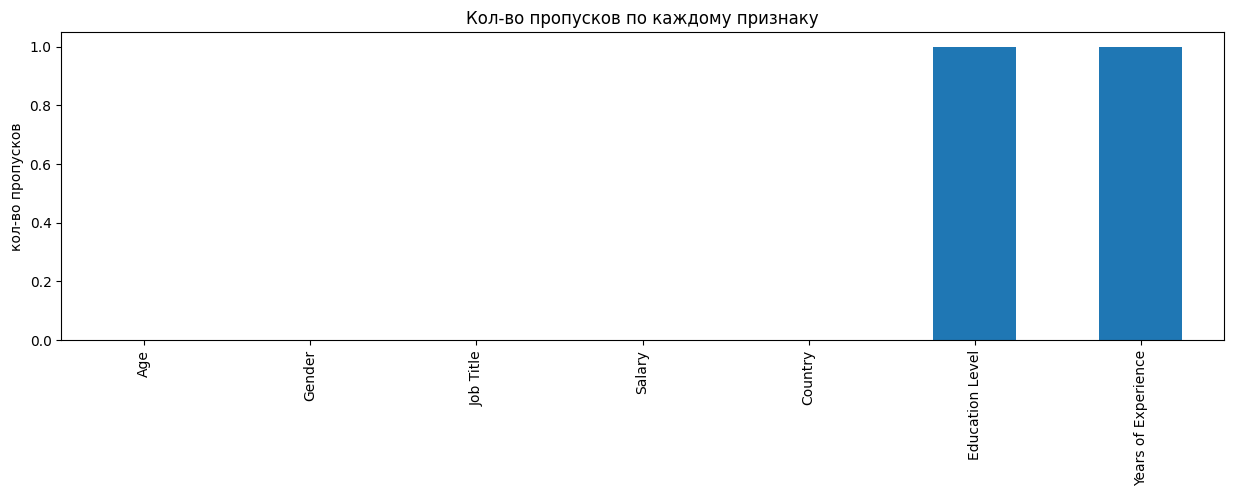

In [96]:
df.isna().sum().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Кол-во пропусков по каждому признаку",
    ylabel="кол-во пропусков")

Вывод:
- пропуски по зарплате однозначно заполняются, т.к. зарплата - целевая аналитическая единица.
- остальные пропуски анализируются с выводом - значимо ли их заполнение / игнорирование для аналитики.

In [97]:
#найдем строки с пропусками Gender
df[df.Gender.isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country


мы видим, что пропуски Gender на самом деле - это почти пустые строки. Данные строки неважны нам для аналитики и мы можем их удалить (сократив тем самым остальные пропуски в Age и Job Title)

In [98]:
#удаляем строки c пустм значением Gender
df = df.dropna(subset=['Gender'],axis=0,how='any')
#осталось три пропуска по зарплате и по одному в образовании и опыте. проанализимруем их
#для удобсьва тут должна быть строка с промежуточной проверкой оставшихся пропуска, но у меня в конце аналогичная диаграмма, чтобы было понятно с чего мы начинали

In [99]:
#найдем строки с пропусками по зарплате
df[df.Salary.isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country


заполнять пропуски по зарплате будем медианными значениями в группировке влияющих параметров. Мы предполагаем, что на зарплату влияют JobTitle, Years of Experience, Education Level. Именно в таком порядке приоритетности. Если предположение верно, то нам повезло, т.к. в JobTitle не осталось пропусков и мы сразу можем заполнить зарплату. Проверяем связи JobTitle и Salary   

In [100]:
df.groupby('Job Title')['Salary'].median().sort_values()
#проблема в том, что должность с пропуском единственная, не можем использовать JobTitle для медианной зарплаты
#перепроверить это мы можем так
#df[df['Job Title'].isin(['Social M'])]

,Salary
Job Title,
Junior Business Operations Analyst,17675.0
Receptionist,25000.0
Junior Sales Associate,26000.0
Delivery Driver,28000.0
Customer Service Representative,30000.0
...,...
VP of Finance,200000.0
Director of Data Science,210000.0
Chief Data Officer,220000.0


In [115]:
#проверяем связь с EduLevel
df.groupby('Education Level')['Salary'].median().sort_values()


,Salary
Education Level,
High School,30000.0
Bachelor's,80000.0
Master's Degree,122000.0
PhD,170000.0
Master's,177500.0


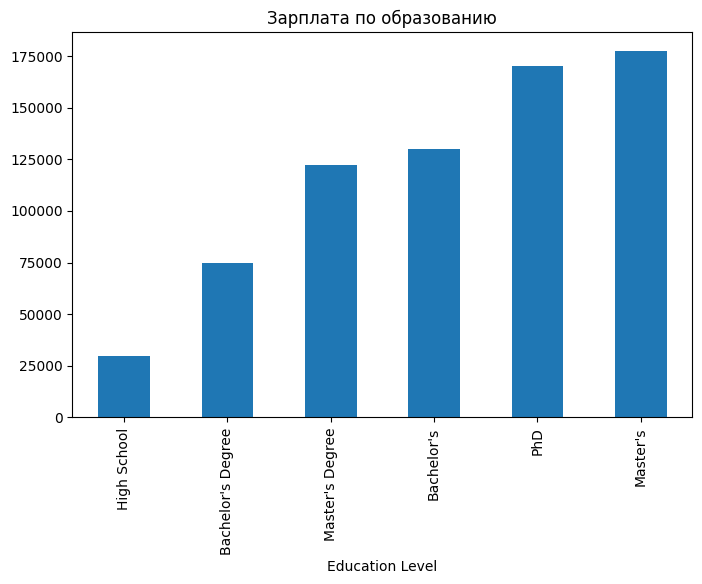

In [101]:

#более наглядно так
plt.figure(figsize=[8,5])
df.groupby('Education Level')['Salary'].median().sort_values().plot(kind="bar")
plt.title('Зарплата по образованию')
plt.show()
#видим прямую зависимость зарплаты и образования

проверить связь с Years of Experience мы можем, но там один пропуск вместе с данными по з/п, нам придётся заполнять этот пропуск по Education Level.
Для чистоты эксперимента мы должны выбрать более точную зависимость из двух: Years of Experience или Education Level.

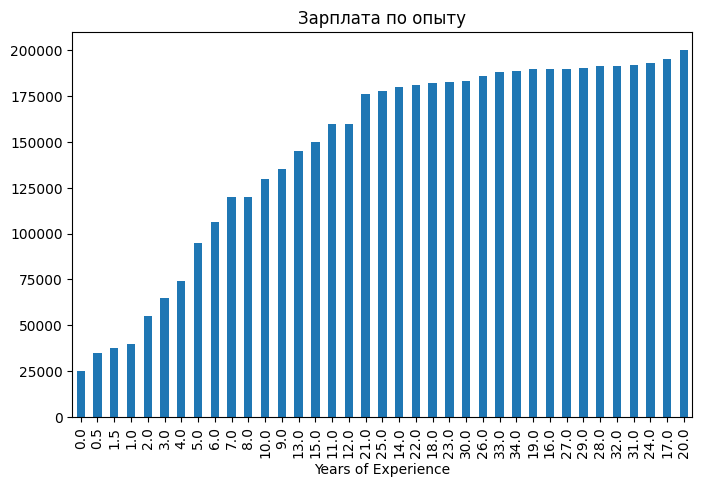

In [102]:
#более наглядно так
plt.figure(figsize=[8,5])
df.groupby('Years of Experience')['Salary'].median().sort_values().plot(kind="bar")
plt.title('Зарплата по опыту')
plt.show()

видим прямую зависимость зарплаты и опыта. При этом каждый год опыта изменяет медианную зарплату, что является более точным для заполнения пропусков

In [103]:
#заполняем пропуски по зарплате сначала по опыту
df['Salary'] = df['Salary'].fillna(df.groupby(by='Years of Experience')['Salary'].transform('median'))

In [104]:
#осталось три пропуска: з/п и опыт в одной строке и уровень образования в другой строке
df[df.Salary.isna()]
# в данной строке содержатся нужные данные. удалять нельзя.

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country


In [105]:
#заполним пропуск по зарплате от Education Level
df['Salary'] = df['Salary'].fillna(df.groupby(by='Education Level')['Salary'].transform('median'))
df.isna().sum()

,0
Age,0
Gender,0
Education Level,1
Job Title,0
Years of Experience,1
Salary,0
Country,0


смотрим оставшися два пропуска

In [106]:
df[df['Education Level'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
2011,27.0,Male,NaN,Developer,7.0,100000.0,UK


Целевой показатель зарплаты заполнен, он находится ниже медианных значений для стажа 7 лет (медиана 120 тыс), но не является выбросом. Пропуск возможно игнорировать.

In [107]:
df[df['Years of Experience'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
5247,26.0,Female,Bachelor's Degree,Social M,NaN,75000.0,USA


Целевой показатель зарплаты заполнен по медианному значению Bachelor's Degree, соответствует стажу 4 года. При этом мы не будем заполнять этот пропуск, т.к. на это влияет ещё два параметра: возраст и пол (например, есть мужчины 27 лет с опытом 7 лет и мы не знаем может ли быть включен декретный отпуск в Years of Experience для USA). При дальнейшем анализе данных будет ясно являются ли такой уровень зарплаты выбросом для возраста и пола. Пропуск игнорируем  

<Axes: title={'center': 'Кол-во пропусков по каждому признаку'}, ylabel='Кол-во пропусков'>

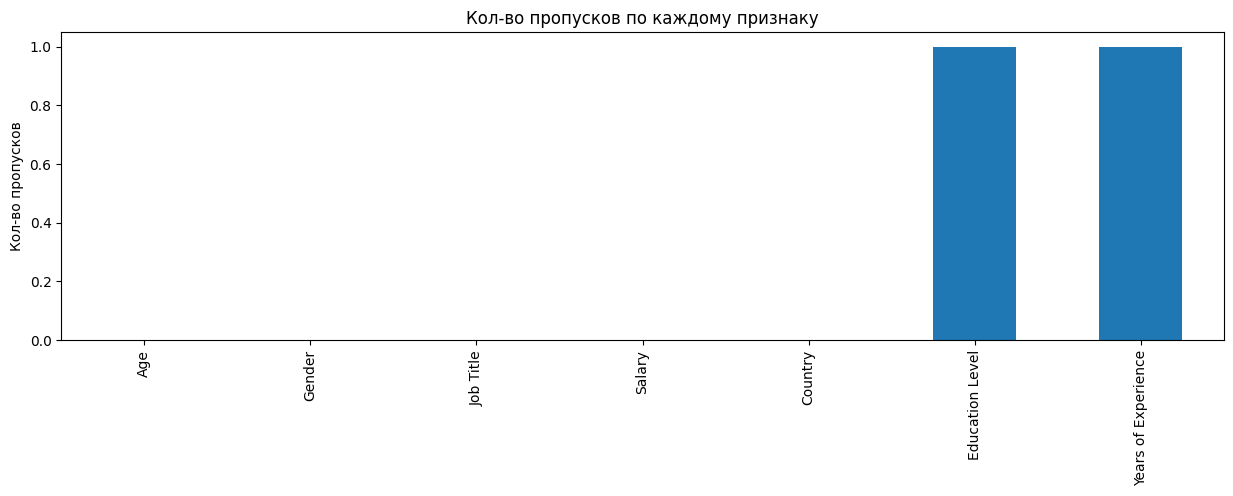

In [108]:
# повторно проверяем наличие пропусков
df.isna().sum().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Кол-во пропусков по каждому признаку",
    ylabel="Кол-во пропусков")

Вывод по пропускам:
- заполнены пропуски по целевому параметру "зарплата" (медаинными значениями в группах опыт и образование)
- проигнорированы пропуски по уровню образования и по опыту.

В Education Level опечатки, влияющие на статистику:
- phD это PhD
- слово Degree лишнее

In [109]:
df['Education Level'].replace('phD','PhD',inplace=True)


In [111]:
df['Education Level'].replace("Bachelor's Degree","Bachelor's",inplace=True)

In [116]:
df['Education Level'].replace("Master's Degree","Master's",inplace=True)

Исключим неинформативные столбцы: считаю, что неинформативным столбцами являются
- Unnamed: 0
- Race

In [ ]:
df.drop(['Unnamed: 0', 'Race'], axis=1, inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6702 non-null   float64
 6   Country              6702 non-null   object 
dtypes: float64(3), object(4)
memory usage: 418.9+ KB


# **Оценка данных** (бул 1 ДЗ)
Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно

**Комментарий к решению:** для изучения данных по столбцам я буду использовать однофакторный анализ

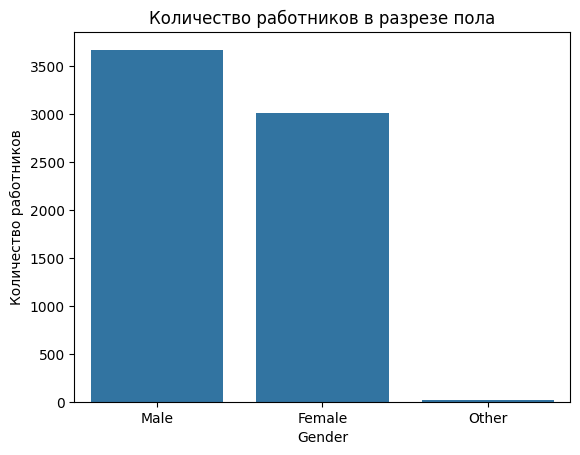

In [66]:
#по полу
sns.countplot(data=df, x='Gender')
plt.title("Количество работников в разрезе пола")
plt.ylabel("Количество работников")
plt.show()

In [ ]:
#df[df['Gender'].isin(['Other'])]   проверка есть ли такое

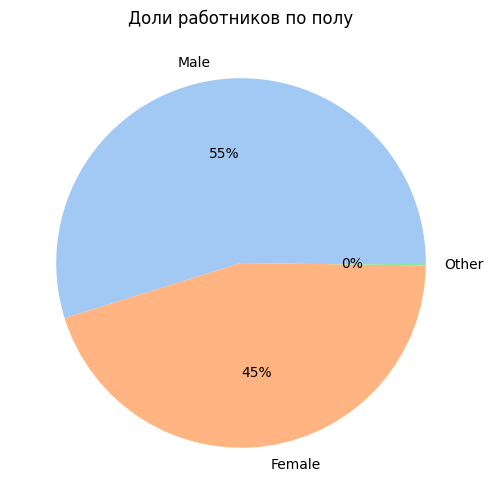

In [73]:
#доли работников по полу
plt.figure(figsize=[6, 6])
data = df['Gender'].value_counts(normalize=True)
labels = ['Male', 'Female', 'Other']
colors = sns.color_palette('pastel')
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title('Доли работников по полу')
plt.show()

55% работающих - мужчины

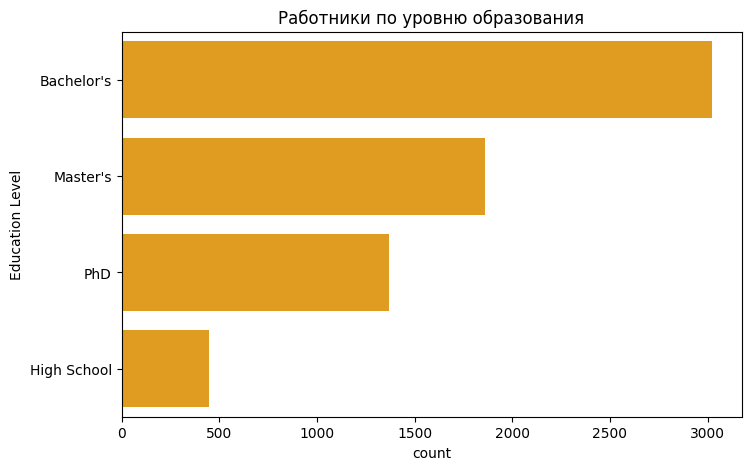

In [118]:
#по опыту работы
plt.figure(figsize=[8,5])
sns.countplot(data=df, y='Education Level', color="orange")
plt.title('Работники по уровню образования')
plt.show()

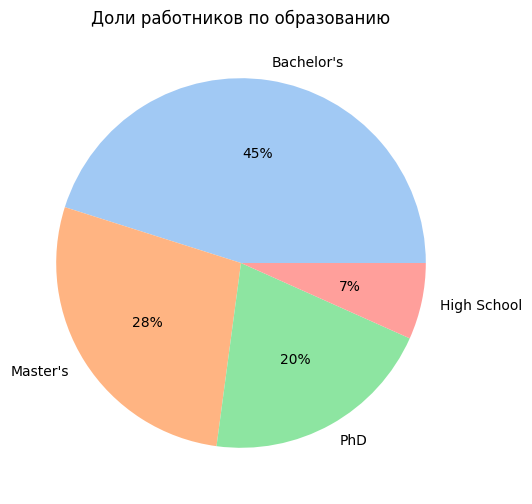

In [120]:
#категорий образования всего 4, поэтому также можно поместить на круговую диаграмму для просмотра долей
#доли работников по образованию
plt.figure(figsize=[6, 6])
data = df['Education Level'].value_counts(normalize=True)
labels = ["Bachelor's", "Master's", 'PhD', 'High School' ]
colors = sns.color_palette('pastel')
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title('Доли работников по образованию')
plt.show()

45% работников имеют начальное высшее образование, 7% школьники

**Распределение данных**

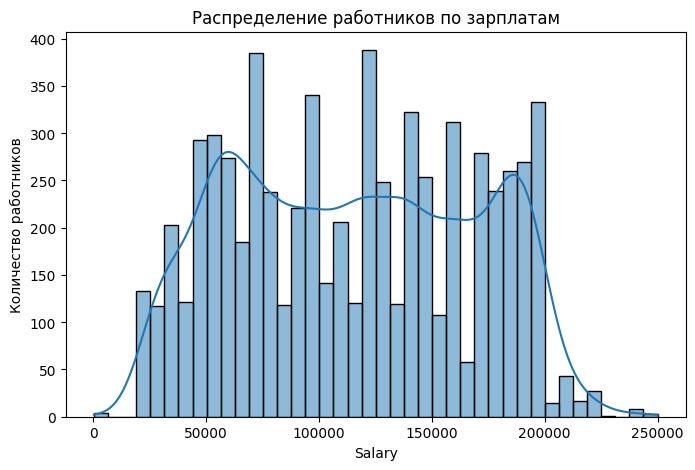

In [127]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Salary', bins=40, kde=True)
plt.title('Распределение работников по зарплатам')
plt.ylabel('Количество работников')
plt.show()

(array([  4.,   0.,   0., 172., 257., 132., 107., 493., 278., 187., 385.,
        240., 305., 175., 240., 300., 123., 388., 253., 128., 370., 228.,
         88., 330., 271., 265., 266., 273., 330.,  15.,  60.,  19.,   9.,
          0.,   8.,   3.]),
 array([   350.        ,   7284.72222222,  14219.44444444,  21154.16666667,
         28088.88888889,  35023.61111111,  41958.33333333,  48893.05555556,
         55827.77777778,  62762.5       ,  69697.22222222,  76631.94444444,
         83566.66666667,  90501.38888889,  97436.11111111, 104370.83333333,
        111305.55555556, 118240.27777778, 125175.        , 132109.72222222,
        139044.44444444, 145979.16666667, 152913.88888889, 159848.61111111,
        166783.33333333, 173718.05555556, 180652.77777778, 187587.5       ,
        194522.22222222, 201456.94444444, 208391.66666667, 215326.38888889,
        222261.11111111, 229195.83333333, 236130.55555556, 243065.27777778,
        250000.        ]),
 <BarContainer object of 36 artists>)

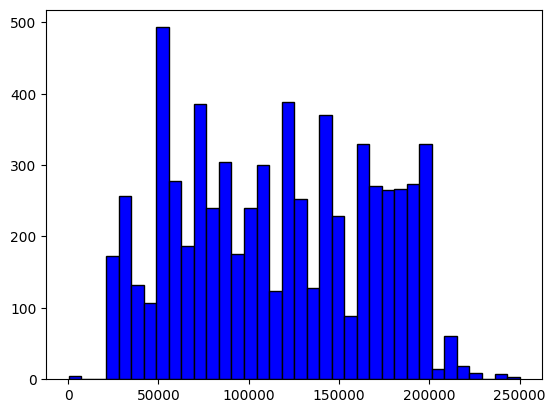

In [131]:
plt.hist(df['Salary'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

распределение не является нормальным

**Базовые статистики**

In [129]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6702.000000
mean,33.620859,8.094687,115320.282080
std,7.614633,6.059003,52776.814204
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


# **Выбросы** (бул 2 ДЗ)
Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

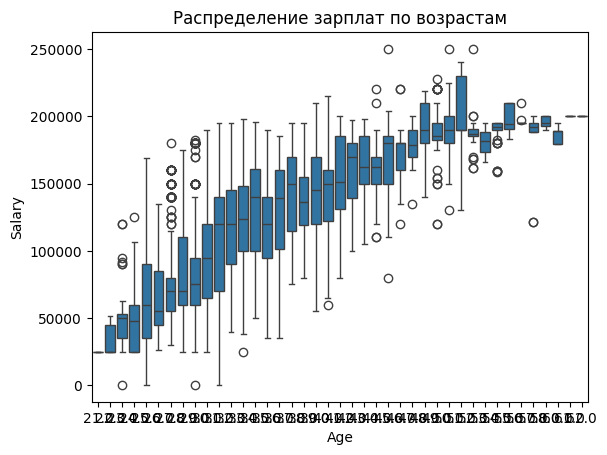

In [137]:
sns.boxplot(data=df, x='Age', y='Salary')
plt.title("Распределение зарплат по возрастам")
plt.show()

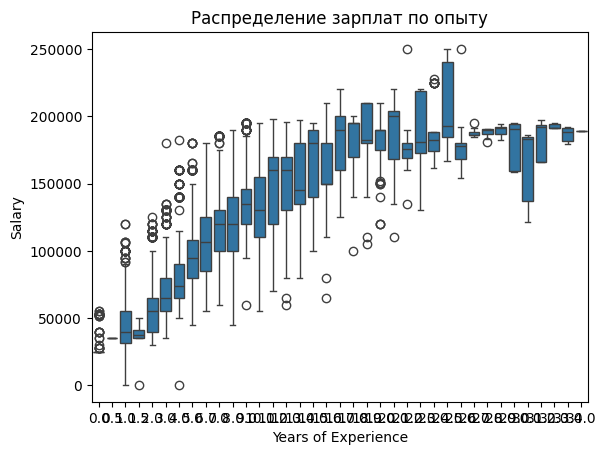

In [136]:
sns.boxplot(data=df, x='Years of Experience', y='Salary')
plt.title("Распределение зарплат по опыту")
plt.show()

Наименьшее количество выбросов прослеживается в зависимости "зарплата-образование".  

# **Вопросы** (бул 3 ДЗ)
Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

**Какое образование предполагает наиболее гарантированный уровень зарплат**
исходя из графика бакалавры и Masters имеют более стабильный уровень дохода. Зарплата же PhD выше, но может быт и существенно ниже, исходя из многочисленных выбросов. *На степень PhD ради зарплаты учиться смысла нет*

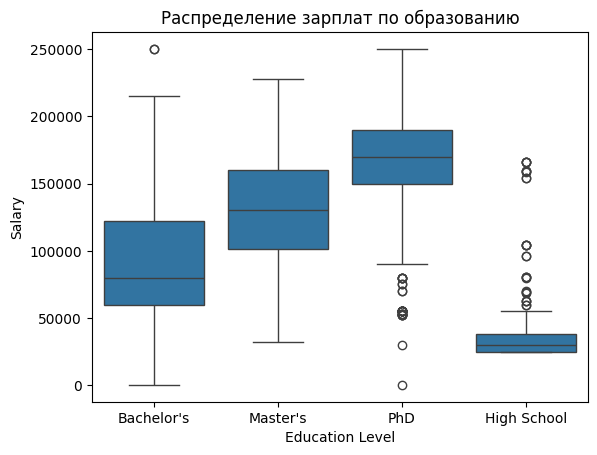

In [146]:
#боксплот
sns.boxplot(data=df, x='Education Level', y='Salary')
plt.title("Распределение зарплат по образованию")
plt.show()

**С возрастом зарплата выше?**
исходя из графика зарплата действительно растёт с возрастом, рост останавливается примерно к 50ти годам. После этого возраста выплаты 200+ - скорее частные случаи, чем правило. *До 50ти есть время стать топ-менеджером, чтобы попасть в выбросы*

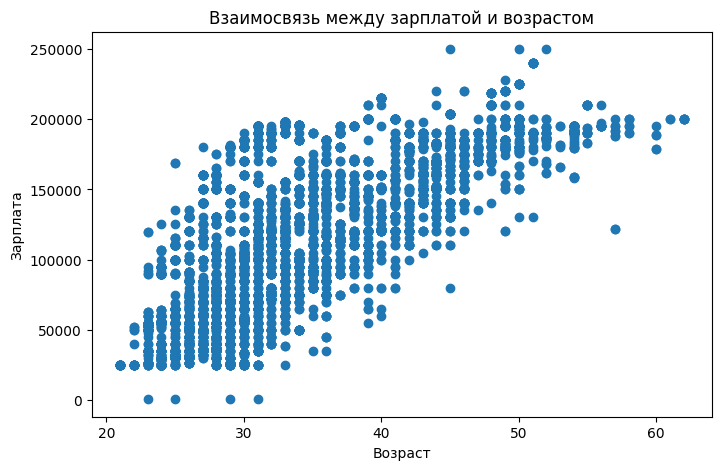

In [145]:
plt.figure(figsize=[8,5])
plt.scatter(data=df, x='Age', y='Salary')
plt.title("Взаимосвязь между зарплатой и возрастом")
plt.ylabel('Зарплата')
plt.xlabel('Возраст')
plt.show()

**Если ты женщина, то получаешь меньше**
исходя из графика данное утверждение скорее верно, чем нет. Чаще встречаются высокие зарплаты у мужчин, чем у женщин. *Фуф*

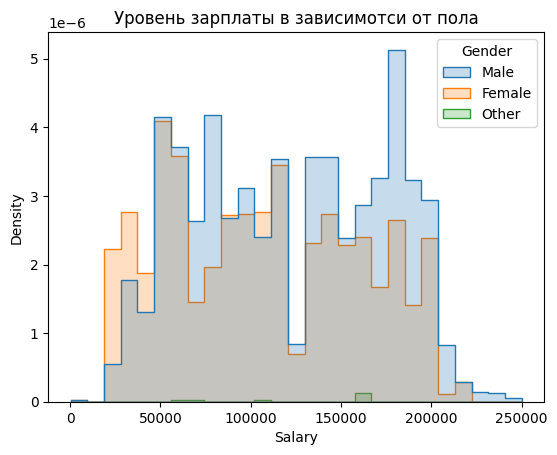

In [147]:
sns.histplot(df, x='Salary', hue='Gender', element="step", stat="density")
plt.title("Уровень зарплаты в зависимотси от пола")
plt.show()

**На какую зарплату можно расчитывать с опытом 10 лет?**
исходя из графика и таблицы, с 15 летним опытом возможно расчитывать на з/п 150 тыс.

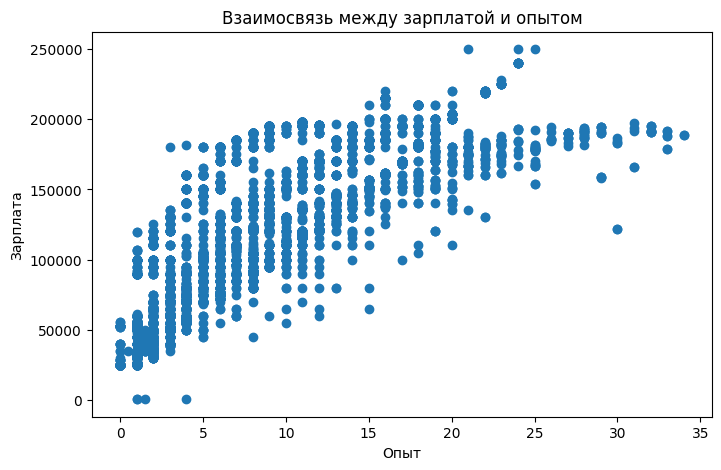

In [151]:
plt.figure(figsize=[8,5])
plt.scatter(data=df, x='Years of Experience', y='Salary')
plt.title("Взаимосвязь между зарплатой и опытом")
plt.ylabel('Зарплата')
plt.xlabel('Опыт')
plt.show()

In [152]:
df.groupby('Years of Experience')['Salary'].median().sort_values()

,Salary
Years of Experience,
0.0,25000.0
0.5,35000.0
1.5,37500.0
1.0,40000.0
2.0,55000.0
3.0,65000.0
4.0,73916.5
5.0,95000.0
6.0,106193.5
